In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\Desktop'

**Importing the Data**

In [3]:
house_data = pd.read_csv("USA_Housing.csv")
house_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


**Removing the columns that are not required**

In [4]:
house_data = house_data.iloc[:,0:6] #Index 6 is written so that it takes till 5th column
house_data.head()
#Address column removed as it doesn't contain location & has long addresses of no use, 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [5]:
'''Label Encoding is not required here to convert char values to num bcoz there was only 1 column here
that had string values & that column has been removed due to no significance'''

'Label Encoding is not required here to convert char values to num bcoz there was only 1 column here\nthat had string values & that column has been removed due to no significance'

**Handling missing values-Preprocessing Technique**

In [6]:
house_data.isnull().sum()
#We remove the variable having 25% or more missing values out of the total data. 


Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
dtype: int64

In [7]:
house_data.info()
#We have 5000 entries here 25% of it is 1250, None of our column is having 1250 or more missing values
'''1st step: 25% is the Threshold value'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


'1st step: 25% is the Threshold value'

In [8]:
'''2nd Technique- Imputation Technique in handling missing value'''
#check what type of variable we have in column , char or num 
#If it is char type then we fill the values by 'mode'
#if column has num values then we check for outliers, if outliers present then we fill 'median' values
# if outliers are not present then we fill missing values with 'mean'
#All are num values in above dataset

'2nd Technique- Imputation Technique in handling missing value'

<Axes: ylabel='Avg. Area Income'>

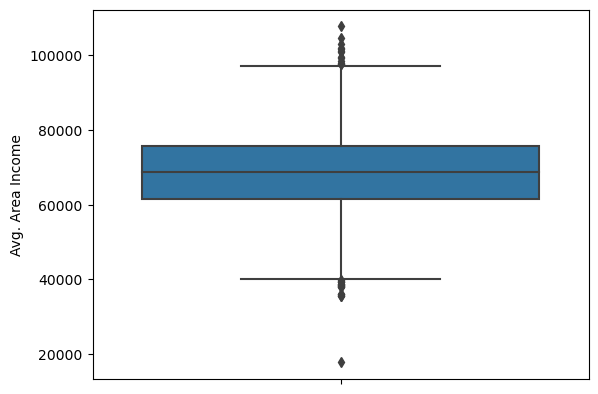

In [9]:
'''Drawing Boxplot for all the columns to check for outlier'''
sns.boxplot(y = 'Avg. Area Income', data = house_data)

<Axes: ylabel='Avg. Area Number of Rooms'>

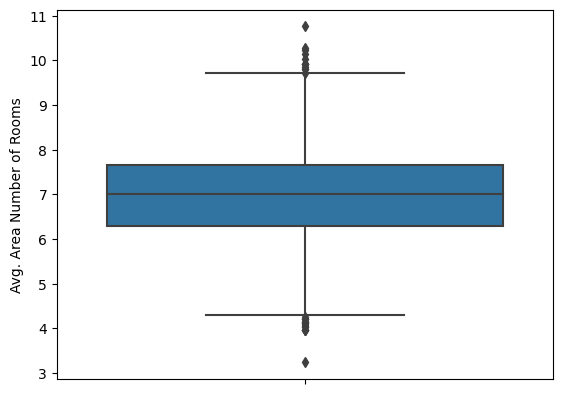

In [10]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data = house_data)

<Axes: ylabel='Avg. Area Number of Bedrooms'>

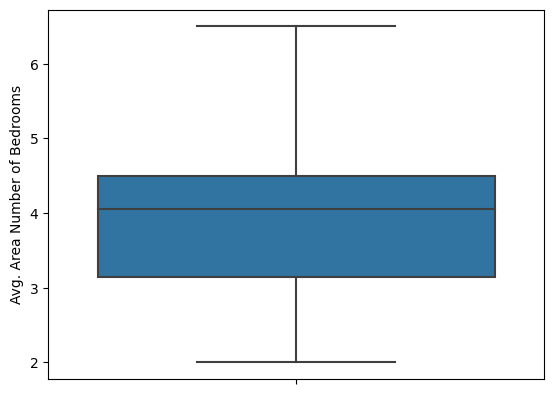

In [11]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data = house_data)

In [12]:
#Avg. Area Income - outlier found
#Avg. Area Number of Rooms- No outier
#Avg. Area Number of Bedrooms- No outlier
'''Drawing boxplot to find the outlier only for the columns in which null value is present '''

'Drawing boxplot to find the outlier only for the columns in which null value is present '

**Filling the column with null values (having outliers) with median**

In [13]:
house_data['Avg. Area Income']=house_data['Avg. Area Income'].fillna(house_data['Avg. Area Income'].median())

**Filling the column consisting null values  ( No outliers) with mean**

In [14]:
house_data['Avg. Area Number of Rooms'] = house_data['Avg. Area Number of Rooms'].fillna(house_data['Avg. Area Number of Rooms'].mean())

In [15]:
house_data['Avg. Area Number of Bedrooms'] = house_data['Avg. Area Number of Bedrooms'].fillna(house_data['Avg. Area Number of Bedrooms'].mean())

In [16]:
'''Checking whether values have become null or not'''
house_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [17]:
house_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.145895,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10640.538021,0.991456,1.005435,1.233756,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002506,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


**To Visualize all the columns**

In [18]:
house_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [19]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

G:\DATA SCIENCE -NOTES\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\DATA SCIENCE -NOTES\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


'Observe 6th Row of the pairplot'

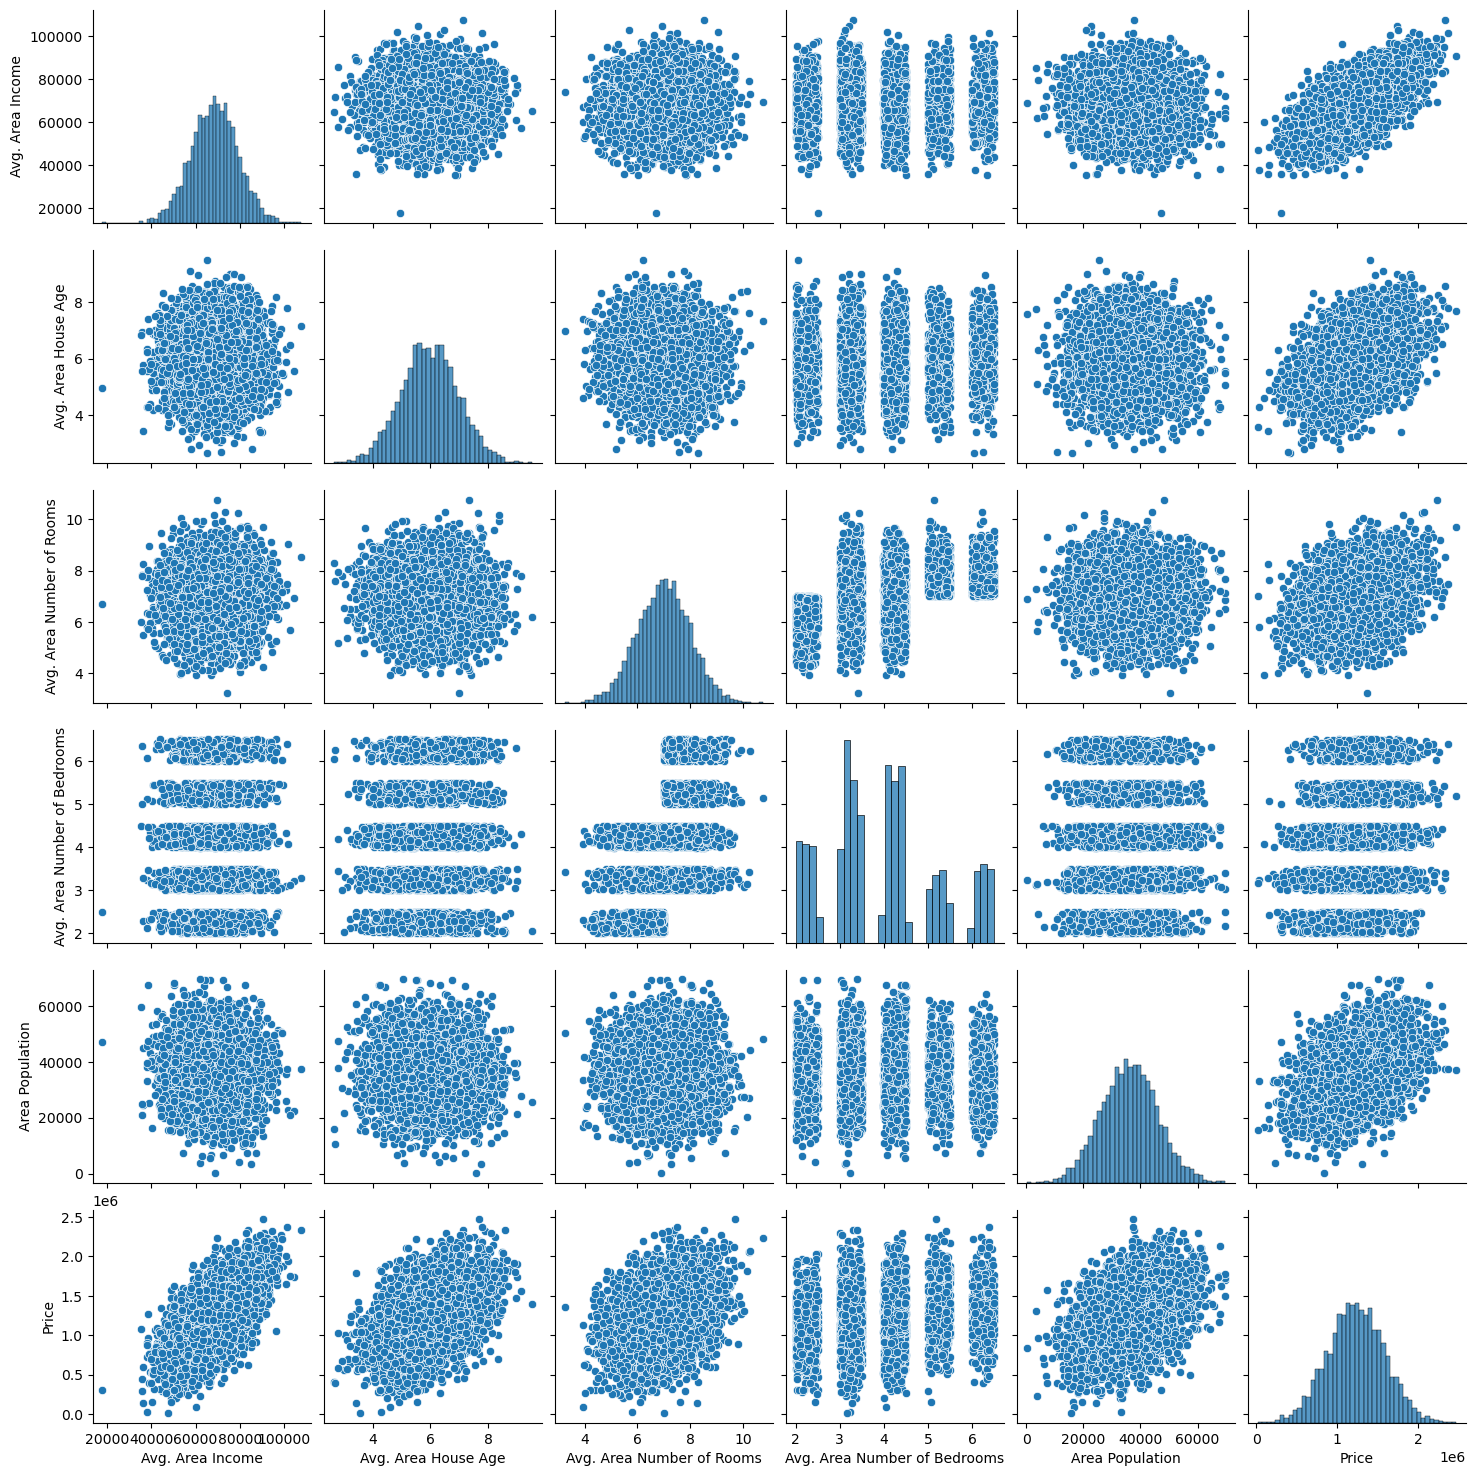

In [20]:
sns.pairplot(house_data[cols], size = 2.5)
'''Observe 6th Row of the pairplot'''
#Price vs Avg Area Income- strong positive relation
#Price vs Avg Area House Age -+ve relation
#Price vs Avg Area Nos of rooms - +ve relation
#Price vs Avg Area Nos of Bedrooms - No relation
#Price vs Population - + relation

**Checking If my data is Normally Distributed (for Target variable)**

C:\Users\hp\AppData\Local\Temp\ipykernel_11356\817824989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

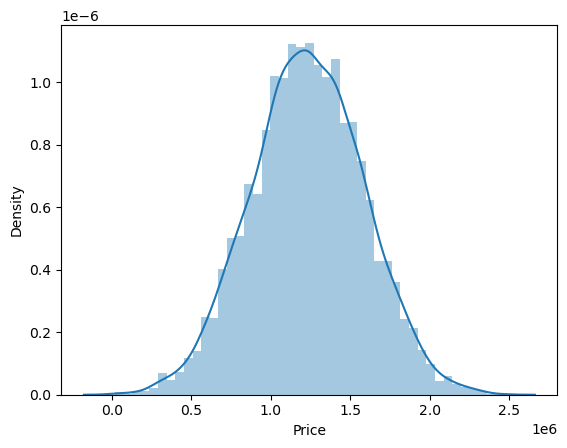

In [21]:
sns.distplot(house_data['Price'])

**Drawing heatmap to visualise correlation among variables**

<Axes: >

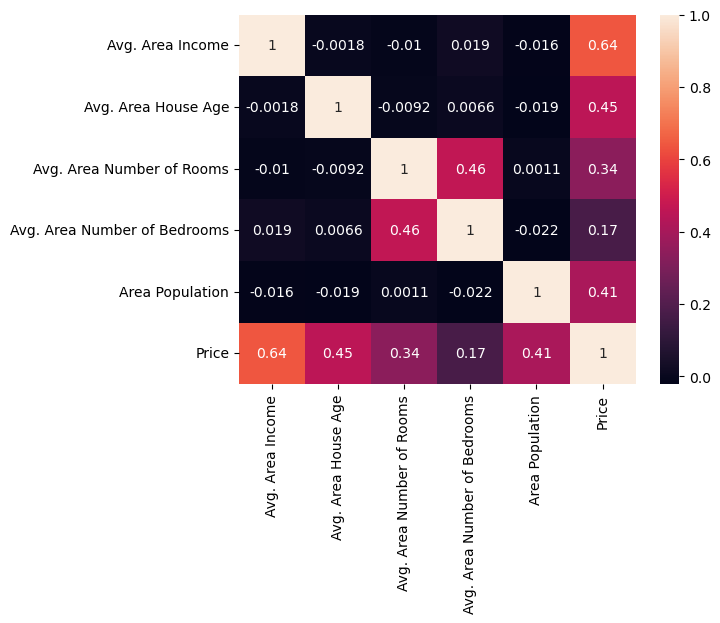

In [22]:
sns.heatmap(house_data.corr(), annot = True)

In [23]:
'''All the above procedure is called EDA'''

'All the above procedure is called EDA'

# **Train & Test Split**

In [24]:
x = house_data.iloc[:,0:5]
#x = house_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = house_data['Price']

In [26]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [27]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75, random_state = 101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 5)
(1250, 5)
(3750,)
(1250,)


In [29]:
#Simple Linear Regression 
#y = mx+ c , m = slope, c = intercept
#y = Bo + B1X1 + B2X2 + B3X3, B - Beta, Bo = intercept, B1,B2.B3... = Slope, X1,X2,X3 = independet variable
# y = dependent variable

# Building Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
lm.intercept_ #( c or Bo)

-2642926.0992613644

In [32]:
lm.coef_ #( B1,B2,B3......)

array([2.16472879e+01, 1.64965804e+05, 1.20984354e+05, 1.93879012e+03,
       1.52552385e+01])

**Arranging coefficient in terms of variables**

In [33]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.647288
Avg. Area House Age,164965.804052
Avg. Area Number of Rooms,120984.354442
Avg. Area Number of Bedrooms,1938.790124
Area Population,15.255238


# Predictions on test data

In [34]:
predictions = lm.predict(x_test)
predictions

array([1258403.86287943,  823238.522819  , 1740974.37262914, ...,
       1117224.01485822,  720601.67654188, 1517211.19076239])

In [35]:
'''Finding the loss function(loss means the error)'''
#MAE-Mean Absolute Error
#MAPE-Mean Absolute Percentage Error
#MSE-Mean Square Error
#RMSE-Root Mean Square Error

'Finding the loss function(loss means the error)'

In [37]:
from sklearn import metrics
print('MSE : ',metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAE : ', metrics.mean_absolute_error(y_test,predictions))

MSE :  10546289741.416971
RMSE : 102695.1300764402
MAE :  82163.91092829667


In [38]:
#Above metrics doesn't really shows the complete picture so let us use OLS Method

In [39]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf


In [40]:
reg_model = sf.OLS(endog = y_train, exog = x_train).fit()
reg_model
#endog-endogenity , it refers to dependent variable
#exog -exogenity, it refers to independent variable

In [41]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.019e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:54:08   Log-Likelihood:                         -51805.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2054      0.312     32.751      0.000       9.594      10.816
Avg. Area House Age           4.911e+04   3459.801     14.195      0.000    4.23e+04    5.59e+04
Avg. Area Number of Rooms    -1.061e+04   3783.983     -2.804      0.005    -1.8e+04   -3190.984
Avg. Area Number of Bedrooms  4902.3356   3622.782      1.353      0.176   -2200.483     1.2e+04
Area Population                  8.5556      0.380     22.534      0.000       7.811       9.300
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.401
Skew:                          -0.004   Prob(JB):                        0.818
Kurtosis:                       2.950   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
'''Rsquare = 1 - (SSE/SST), value is b/w 0 & 1 , closer to 1 good model'''
'''Adj Rsquare considers only significant variable & it is also showing good %age'''
#If Adj R2 value or R2 value is below 70% then we try to improve it , below 70% not acceptable
'''P-value of Average Area Num of Bedrooms: is 0.176, C.I = 0.824, p-value is acceptable if it is 
less than 0.05, hence Avg Area Num of Bedrooms variable is insiginificant'''

'Adj Rsquare considers only significant variable & it is also showing good %age'

In [43]:
#Interview Question
'''Assumptions in Linear Regression Model
1) Data should be linear line
2) there should not be any heteroscadicity
3) there should not be any autocorrelation - autocorr range is b/w 0 to 4 & for that we do Durbin Watson
Test, if Dub-Watson test gives 2 , it means no correlation, less than 2- +ve correlation, greater than
2- -ve correlation
4) ther should not be any multicollinearity
5) select right enodenity

Apart from accuracy i.e Adj R square & p-value, we need to check the above assumptions as well'''



'Assumptions in Linear Regression Model\n1) Data should be linear line\n2) there should not be any heteroscadicity\n3) there should not be any autocorrelation\n4) ther should not be any multicollinearity\n5) select right enodenity'

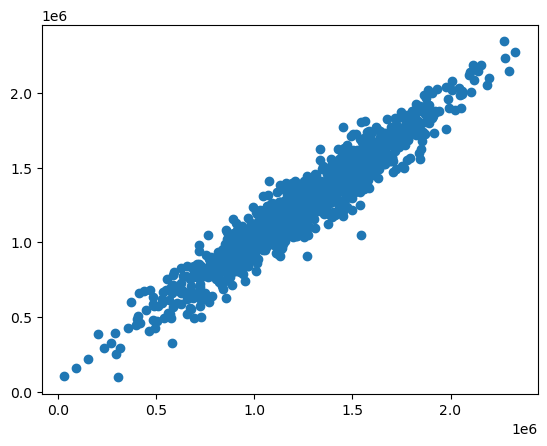

In [44]:
'''Check - Data should be linear line'''
plt.scatter(y_test,predictions)
#Yes it is linearly spread, 1st condition satisfied

C:\Users\hp\AppData\Local\Temp\ipykernel_11356\487510741.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 50)


<Axes: xlabel='Price', ylabel='Density'>

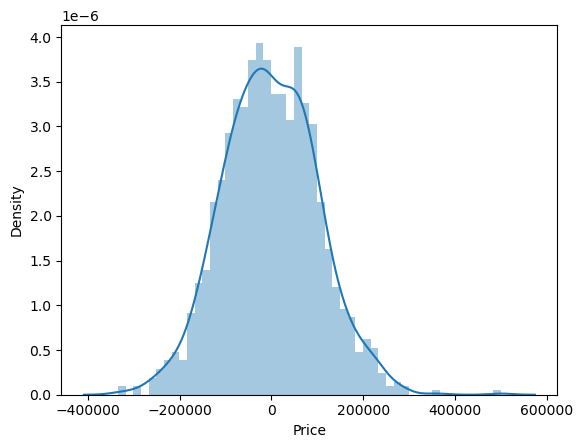

In [47]:
'''2) there should not be any heteroscadicity, to check this we can draw distribution plot of errors, 
if graph is normally distributed it means there is no heteroscadicity'''
sns.distplot((y_test - predictions), bins = 50)
#graph is normally distirbuted

In [ ]:
'''In our Model Durbin-Watson is 1.999 which is close to 2 ,similarly if it is b/w 1.5 to 2.5 we can say
that there is no auto-correlation, no autocorrelation check is also satisfied for the model'''

In [ ]:
'''there should not be any multicollinearity - we can check this by heatmap of Variance Inflation Factor
(VIF > 5 shows presence of Multicollinarity), best is to use a heatmap & check the bottom most row w.rt
dependent variable, if any of the values are same that means multicollinearity is present, 
In this dataset no value in the bottom row is same hence no multicollinarity'''

In [ ]:
'''5) select right enodenity- this is satisfied as I have selected right dependent variable i.e Price'''

In [ ]:
#Interview Question: Biggest problem in ML ?
#Ans: Overfitting & Underfitting
#Below code is written for this question on how to check

In [50]:
#prediction_one = lm.predict(x_train)

In [51]:
#from sklearn.metrics import r2_score

In [54]:
#r2_score(y_test, predictions)

In [55]:
#r2_score(y_train,prediction_one)